In [ ]:
!pip install scikit-fuzzy


In [ ]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt


## Modelar el ratio de evapotranspiración potencial (RETP) como una variable lingüística

In [ ]:
regionesLatitudinales = ['POLAR','SUBPOLAR','BOREAL', 'TEMPLADA FRIA', 'TEMPLADA CALIDA', 'SUBTROPICAL', 'TROPICAL' ]
rangosPertenencia= [(0, 1.5),(1.5,3),(3,6),(6,12),(12,18),(18,24),(24,30)]
fajasAltitudinales = ['NIVAL', 'ALPINO', 'SUBALPINO', 'MONTANO', 'MONTANO BAJO', 'PREMONTANO', 'BASAL']

BT = {
    'nombre':'biotemperatura media anual',
    'abreviatura':'BT',
    'rango':(0,30), # 0 <= x <= 30, x \in ºC
    'unidadMedida': 'ºC',
    'universoDiscurso': (-273,180), # -273 <= x <= 180, x \in K
    'valoresLiguisticos': [regionesLatitudinales, fajasAltitudinales],
}


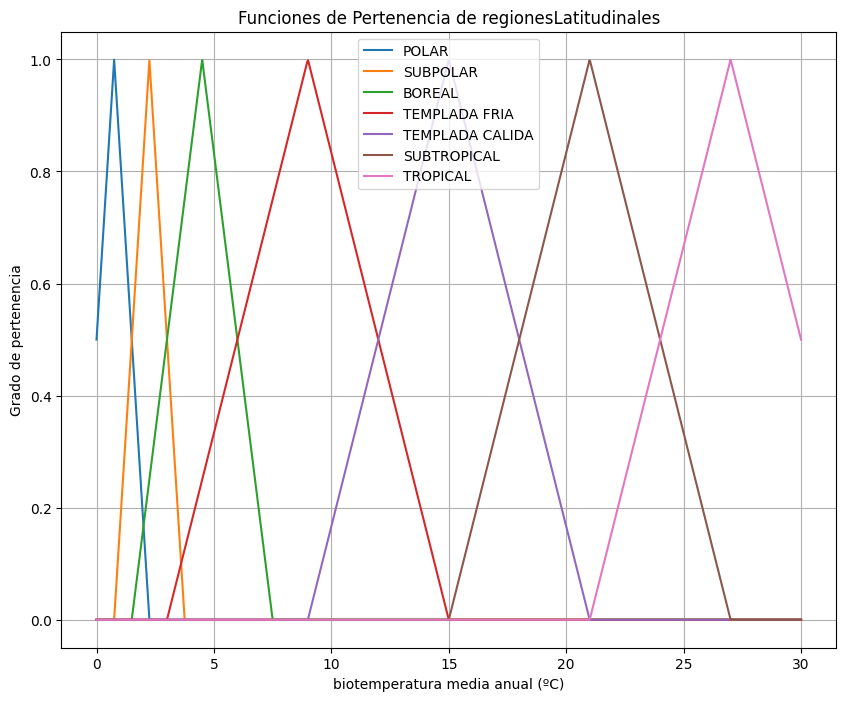

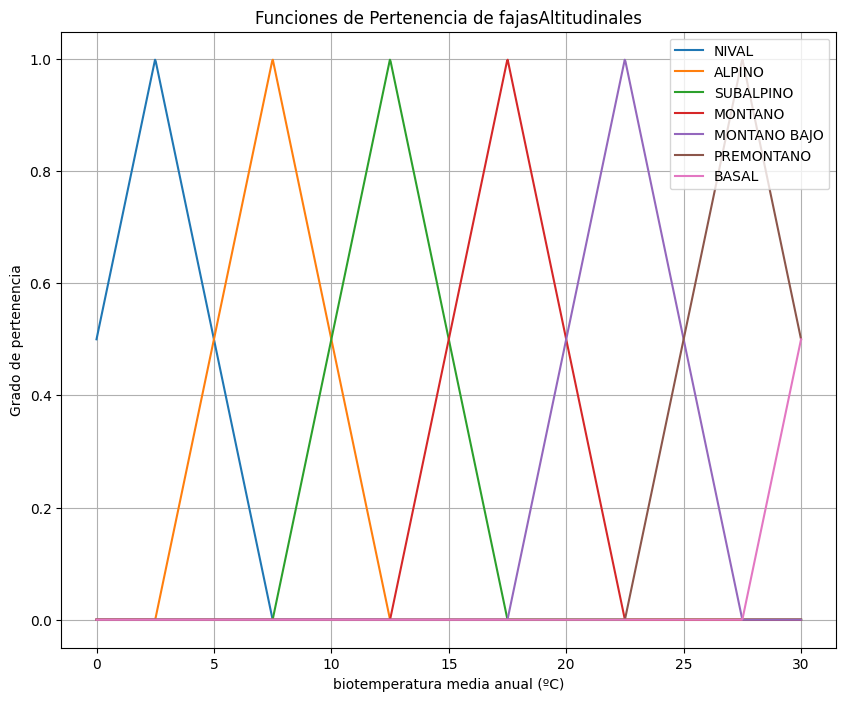

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
"""
Ejemplo temperatura
  Rango: [-80, 60]
  Universo:[0,30] -> de las etiquetas

"""
# Datos iniciales
regionesLatitudinales = [
    {'etiqueta': 'POLAR', 'f_pertenecia': (0, 1.5)},
    {'etiqueta': 'SUBPOLAR', 'f_pertenecia': (1.5, 3)},
    {'etiqueta': 'BOREAL', 'f_pertenecia': (3, 6)},
    {'etiqueta': 'TEMPLADA FRIA', 'f_pertenecia': (6, 12)},
    {'etiqueta': 'TEMPLADA CALIDA', 'f_pertenecia': (12, 18)},
    {'etiqueta': 'SUBTROPICAL', 'f_pertenecia': (18, 24)},
    {'etiqueta': 'TROPICAL', 'f_pertenecia': (24, 30)}
]

fajasAltitudinales = [
    {'etiqueta': 'NIVAL', 'f_pertenecia': (0, 5)},
    {'etiqueta': 'ALPINO', 'f_pertenecia': (5, 10)},
    {'etiqueta': 'SUBALPINO', 'f_pertenecia': (10, 15)},
    {'etiqueta': 'MONTANO', 'f_pertenecia': (15, 20)},
    {'etiqueta': 'MONTANO BAJO', 'f_pertenecia': (20, 25)},
    {'etiqueta': 'PREMONTANO', 'f_pertenecia': (25, 30)},
    {'etiqueta': 'BASAL', 'f_pertenecia': (30, 35)}
]

BT = {
    'nombre': 'biotemperatura media anual',
    'abreviatura': 'BT',
    'universoDiscurso': (0, 30),  # 0 <= x <= 30, x \in ºC
    'unidadMedida': 'ºC',
    'rango': (-273, 180),  # -273 <= x <= 180, x \in K
    'valoresLinguisticos': [
        {'nombre': 'regionesLatitudinales', 'valores': regionesLatitudinales},
        {'nombre': 'fajasAltitudinales', 'valores': fajasAltitudinales},
    ],
}
fuzzyA= 0.5
fuzzyB= 0.5
def calcular_funciones_pertenencia(valores, rango):
    x = np.linspace(rango[0], rango[1], 1000)
    membership_functions = {}

    for item in valores:
        a, b = item['f_pertenecia']
        diff = (b-a) * fuzzyA
        a = a- diff
        b = b+ diff
        mf = fuzz.trimf(x, [a, (a + b) / 2, b])
        membership_functions[item['etiqueta']] = mf

    return x, membership_functions

def mostrar_variable(var):
    for elemento in var['valoresLinguisticos']:
        x, membership_functions = calcular_funciones_pertenencia(elemento['valores'], var['universoDiscurso'])

        # Graficar las funciones de pertenencia
        plt.figure(figsize=(10, 8))
        for etiqueta, mf in membership_functions.items():
            plt.plot(x, mf, label=etiqueta)

        plt.title(f"Funciones de Pertenencia de {elemento['nombre']}")
        plt.xlabel(f"{var['nombre']} ({var['unidadMedida']})")
        plt.ylabel('Grado de pertenencia')
        plt.legend()
        plt.grid(True)
        plt.show()

# Llamar a la función para mostrar las gráficas
mostrar_variable(BT)

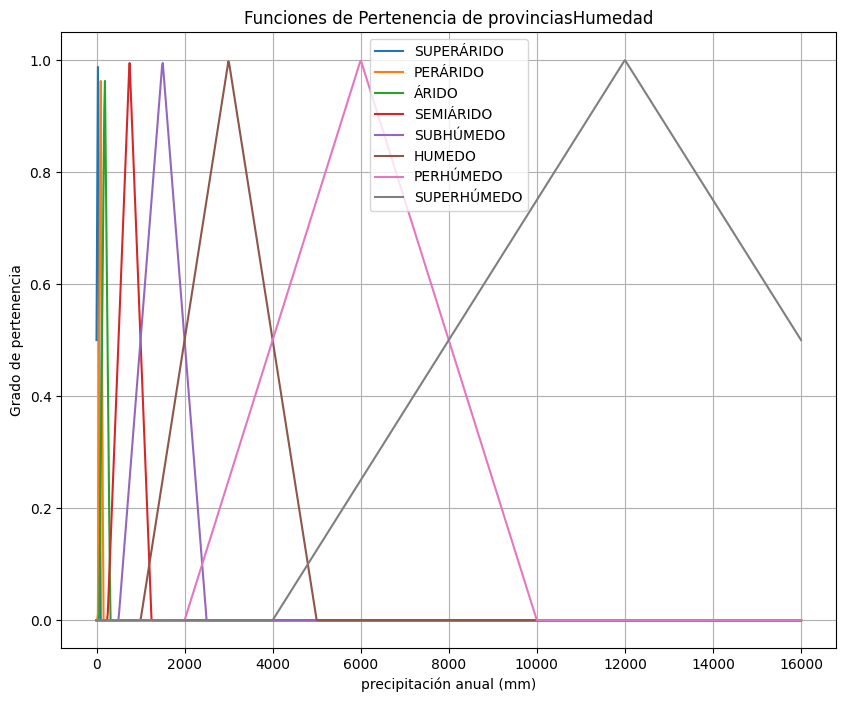

In [ ]:

provinciasHumedad = [
    {'etiqueta': 'SUPERÁRIDO', 'f_pertenecia': (0, 62.5)},
    {'etiqueta': 'PERÁRIDO', 'f_pertenecia': (62.5, 125)},
    {'etiqueta': 'ÁRIDO', 'f_pertenecia': (125, 250)},
    {'etiqueta': 'SEMIÁRIDO', 'f_pertenecia': (500, 1000)},
    {'etiqueta': 'SUBHÚMEDO', 'f_pertenecia': (1000, 2000)},
    {'etiqueta': 'HUMEDO', 'f_pertenecia': (2000, 4000)},
    {'etiqueta': 'PERHÚMEDO', 'f_pertenecia': (4000, 8000)},
    {'etiqueta': 'SUPERHÚMEDO', 'f_pertenecia': (8000, 16000)}

]

PP = {
    'nombre':'precipitación anual',
    'abreviatura':'PP',
    'universoDiscurso':(0,16000), # 0 <= x <= 30, x \in ºC
    'unidadMedida': 'mm',
    'rango': (-273,180), # -273 <= x <= 180, x \in K
    'valoresLinguisticos': [
        {'nombre': 'provinciasHumedad', 'valores': provinciasHumedad}
    ],
}

mostrar_variable(PP)

In [ ]:
RETP = {
    'nombre':'biotemperatura media anual',
    'abreviatura':'BT',
    'rango':(0,30), # 0 <= x <= 30, x \in ºC
    'unidadMedida': 'ºC',
    'universoDiscurso': (-273,180), # -273 <= x <= 180, x \in K
    'valoresLiguisticos': [regionesLatitudinales, fajasAltitudinales],
}


# Práctica 2

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [ ]:
# Variables de entrada
latitud = ctrl.Antecedent(np.arange(0, 90, 1), 'latitud')  # Latitud entre 0 y 90 grados
altitud = ctrl.Antecedent(np.arange(0, 5000, 1), 'altitud')  # Altitud entre 0 y 5000 metros
    # if (antecedente) Then (Consecuente)
# Variable de salida
biotemperatura = ctrl.Consequent(np.arange(0, 30, 1), 'biotemperatura')  # BT entre 0°C y 30°C


In [ ]:
# Funciones de pertenencia para la latitud
# Todo: Está en decimal y no en GRADOS!
def punto_medio(a, b):
    return (a + b) / 2
def grados2decimal(grado, minuto = 0, segundos = 0):
    decimal = grado+ (minuto/60) + (segundos/3600)
    return decimal


latitud['tropical'] = fuzz.trimf(latitud.universe, [
    grados2decimal(0),
    grados2decimal(6, 30),  # 6 grados 30 minutos
    grados2decimal(13)
])

latitud['subtropical'] = fuzz.trimf(latitud.universe, [
    grados2decimal(13),
    grados2decimal(19,30),
    grados2decimal(27, 48)  # 27 grados 48 minutos
])

latitud['templado_calido'] = fuzz.trimf(latitud.universe, [
    grados2decimal(27, 48),
    grados2decimal(33,30),
    grados2decimal(42)
])

latitud['templado_frio'] = fuzz.trimf(latitud.universe, [
    grados2decimal(42),
    grados2decimal(49,09),
    grados2decimal(56, 18)  # 56 grados 18 minutos
])

latitud['boreal'] = fuzz.trimf(latitud.universe, [
    grados2decimal(56, 18),
    grados2decimal(59,73),
    grados2decimal(63, 27)  # 63 grados 27 minutos
])

latitud['sub_polar'] = fuzz.trimf(latitud.universe, [
    grados2decimal(63, 27),
    grados2decimal(65),
    grados2decimal(68)
])

latitud['polar'] = fuzz.trimf(latitud.universe, [
    grados2decimal(68),
    grados2decimal(79),
    grados2decimal(90)
])


SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-1-1e334482c5cb>, line 30)

In [ ]:
fajasAltitudinales = [
    {'etiqueta': 'NIVAL', 'f_pertenecia': (0, 5)},
    {'etiqueta': 'ALPINO', 'f_pertenecia': (5, 10)},
    {'etiqueta': 'SUBALPINO', 'f_pertenecia': (10, 15)},
    {'etiqueta': 'MONTANO', 'f_pertenecia': (15, 20)},
    {'etiqueta': 'MONTANO BAJO', 'f_pertenecia': (20, 25)},
    {'etiqueta': 'PREMONTANO', 'f_pertenecia': (25, 30)},
    {'etiqueta': 'BASAL', 'f_pertenecia': (30, 35)}
]

# Funciones de pertenencia para la altitud
# TODO: FALTA MODELAR CORRECTAMENTE
altitud['NIVAL'] = fuzz.trimf(altitud.universe, [4500, 4625, 4750])
altitud['ALPINO'] = fuzz.trimf(altitud.universe, [4000, 4250, 4500])
altitud['SUBALPINO'] = fuzz.trimf(altitud.universe, [3000, 3500, 4000])
altitud['MONTANO'] = fuzz.trimf(altitud.universe, [2000, 2500, 3000])
altitud['MONTANO BAJO'] = fuzz.trimf(altitud.universe, [1000, 1500, 2000])
altitud['PREMONTANO'] = fuzz.trimf(altitud.universe, [500, 750, 1000])
altitud['BASAL'] = fuzz.trimf(altitud.universe, [0, 0, 1000])

In [ ]:

# Funciones de pertenencia para la biotemperatura
biotemperatura['0~1.5'] = fuzz.trimf(biotemperatura.universe, [0, 0, 1.5])
biotemperatura['~6'] = fuzz.trimf(biotemperatura.universe, [1.5, 0, 3])
biotemperatura['~12'] = fuzz.trimf(biotemperatura.universe, [3, 0, 6])
